### Dataset Description
###### Overview
###### The data has been split into two groups:
###### training set (train.csv)
###### test set (test.csv)
###### The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
###### The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
###### We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
###### Data Dictionary
###### Variable	Definition	Key
###### survival	Survival	0 = No, 1 = Yes
###### pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
###### sex	Sex	
###### Age	Age in years	
###### sibsp	# of siblings / spouses aboard the Titanic	
###### parch	# of parents / children aboard the Titanic	
###### ticket	Ticket number	
###### fare	Passenger fare	
###### cabin	Cabin number	
###### embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
###### Variable Notes
###### pclass: A proxy for socio-economic status (SES)
###### 1st = Upper
###### 2nd = Middle
###### 3rd = Lower
###### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
###### sibsp: The dataset defines family relations in this way...
###### Sibling = brother, sister, stepbrother, stepsister
###### Spouse = husband, wife (mistresses and fiancés were ignored)
###### parch: The dataset defines family relations in this way...
###### Parent = mother, father
###### Child = daughter, son, stepdaughter, stepson
###### Some children travelled only with a nanny, therefore parch=0 for them.

### Importing Libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc= {'figure.figsize':(12,10)})

### Loading dataset

In [95]:
data = pd.read_csv("titanic_data.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Types of Features :

Categorical - Sex, and Embarked.

Continuous - Age, Fare

Discrete - SibSp, Parch.

Alphanumeric - Cabin

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numerical value Analysis

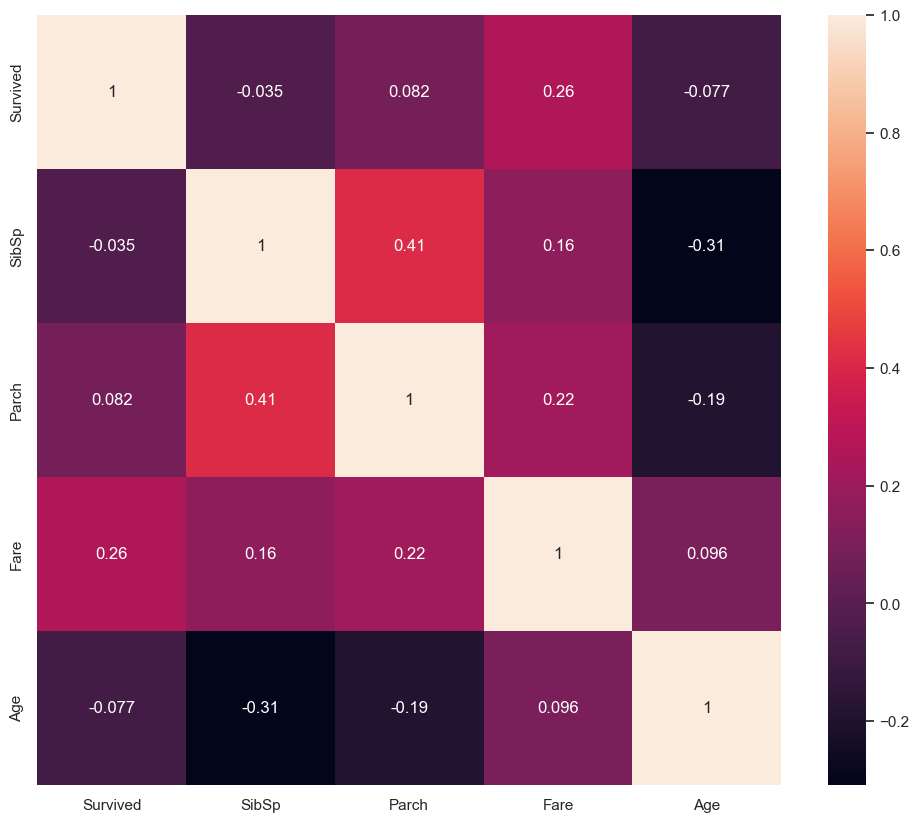

In [99]:
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Fare","Age"]].corr(), annot= True)

### sibsp - no of siblings / spouses aboard the Titanic

In [100]:
data['SibSp'].nunique()

7

In [101]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


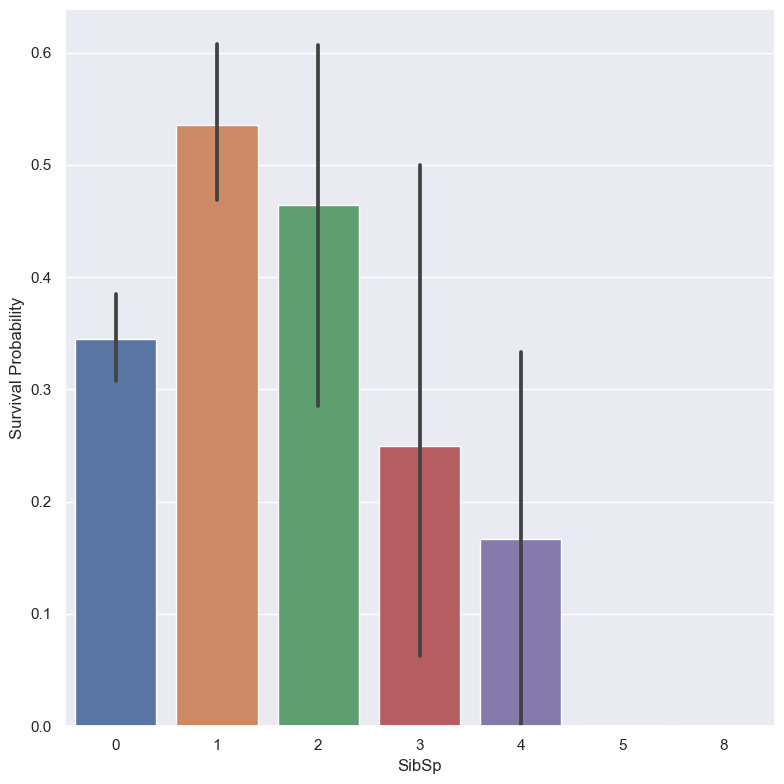

In [102]:
sns.catplot(x = 'SibSp' , y = "Survived", data=data, kind='bar',height=8).set_ylabels("Survival Probability")

### Age param

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Asus\anaconda3\Lib\site

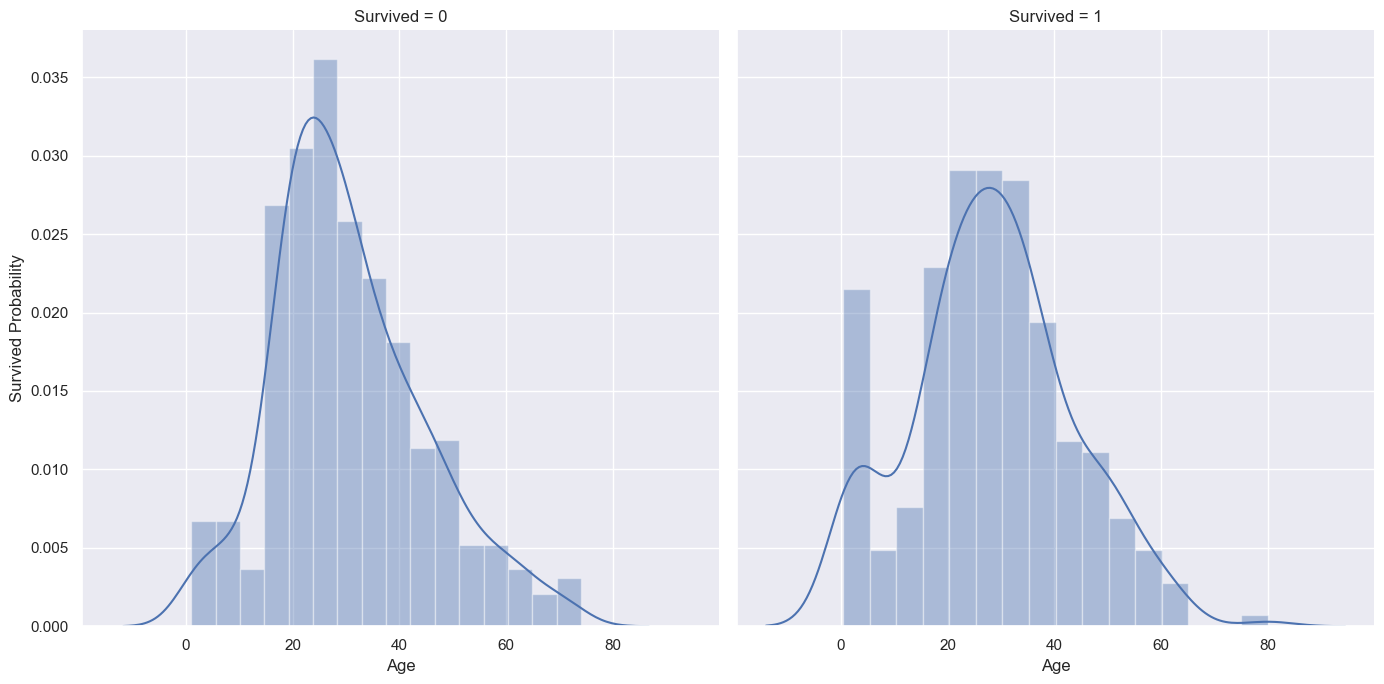

In [103]:
age_visual = sns.FacetGrid(data, col= "Survived", height=7)
age_visual = age_visual.map(sns.distplot, "Age").set_ylabels("Survived Probability")

### Sex param

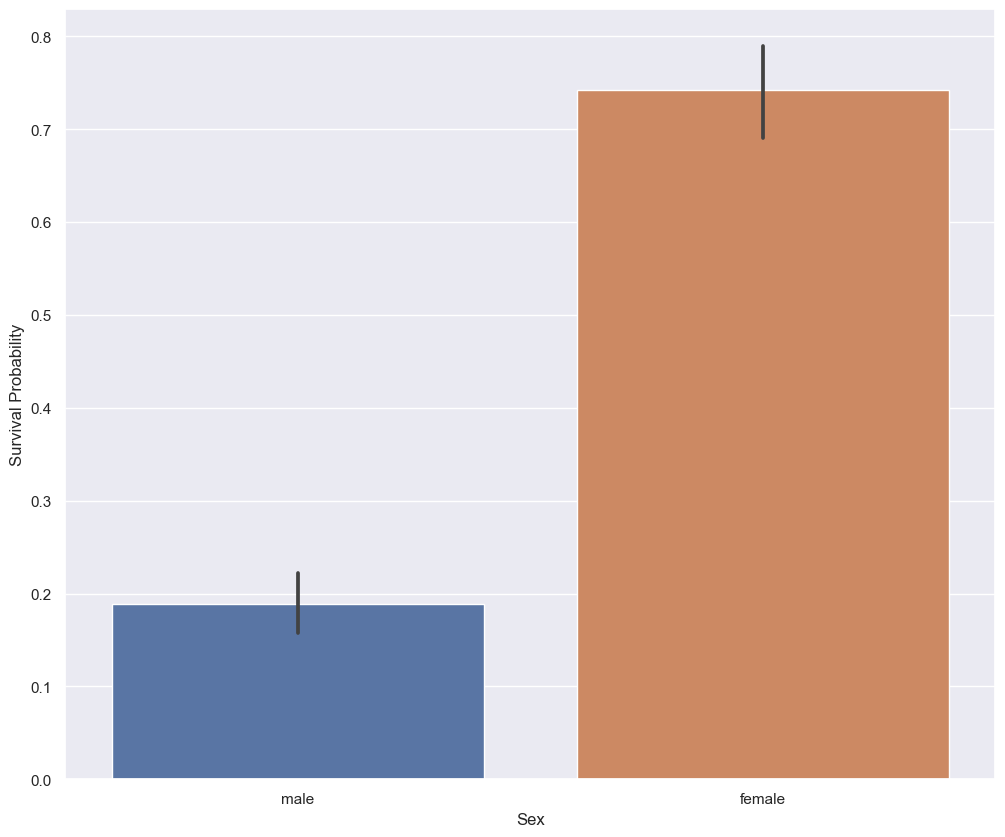

In [104]:
gender_plot = sns.barplot(x ="Sex", y="Survived",data = data).set_ylabel("Survival Probability")

In [105]:
data[['Sex',"Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


### Pclass param


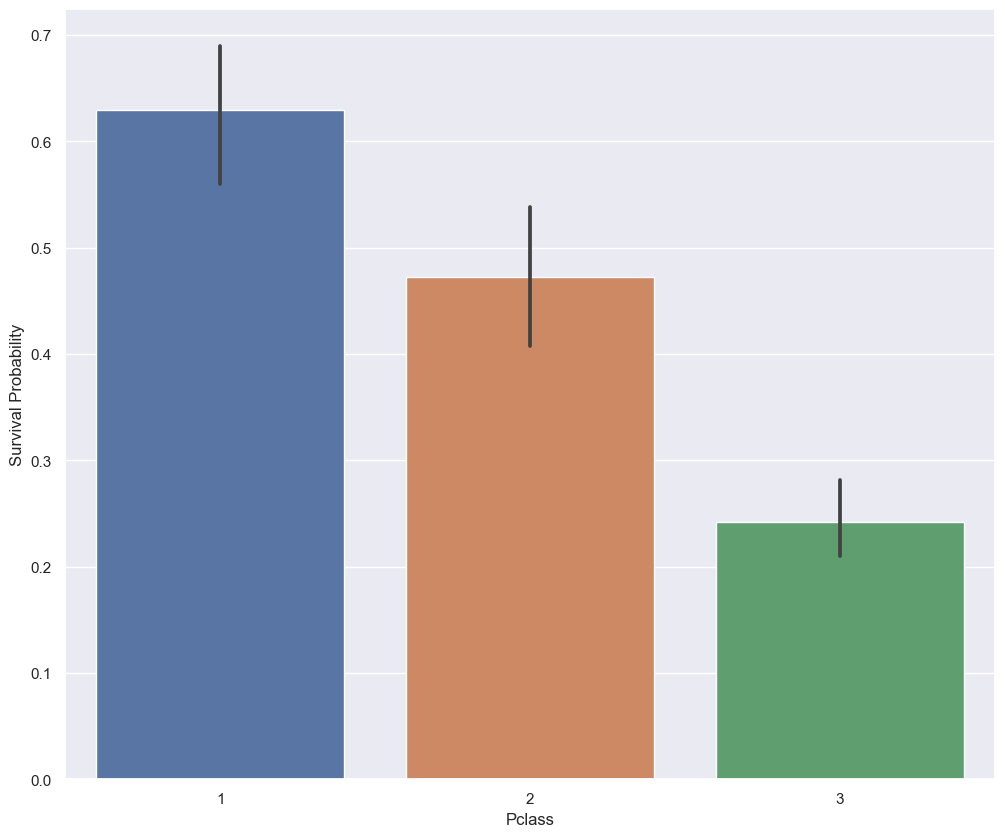

In [106]:
pclass_plot = sns.barplot(x ="Pclass", y="Survived",data = data).set_ylabel("Survival Probability")

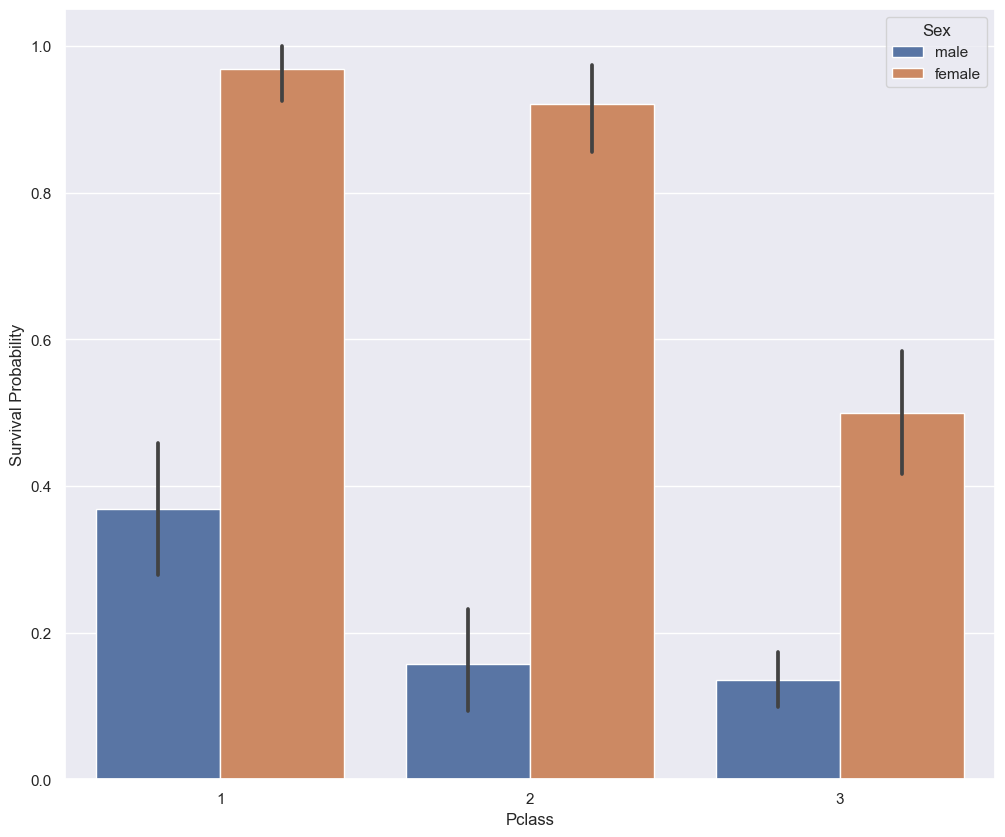

In [107]:
pclass_plot = sns.barplot(x ="Pclass", y="Survived",data = data,hue="Sex").set_ylabel("Survival Probability")

### Embarked

In [108]:
data['Embarked'].isnull().sum()

2

In [109]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [110]:
data['Embarked'] = data['Embarked'].fillna("S")

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


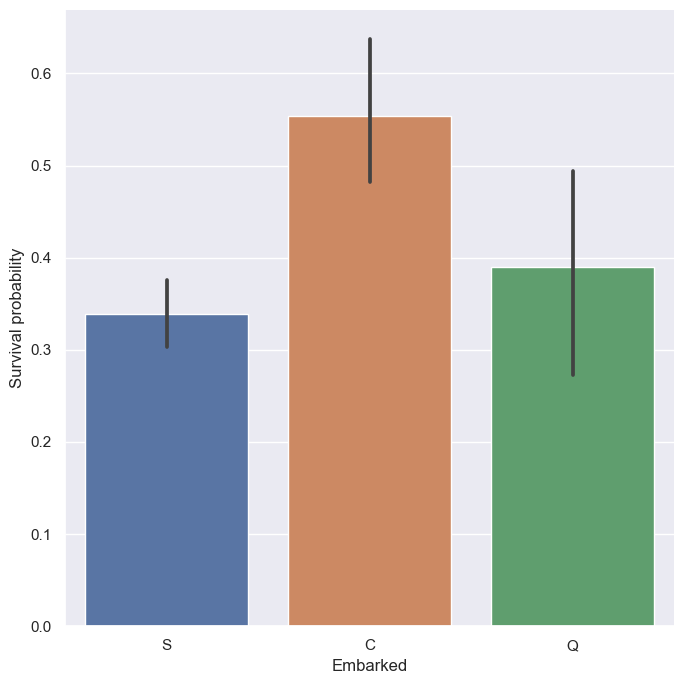

In [111]:
g = sns.catplot(x="Embarked", y="Survived",data=data, height=7, kind="bar")
g = g.set_ylabels("Survival probability")

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


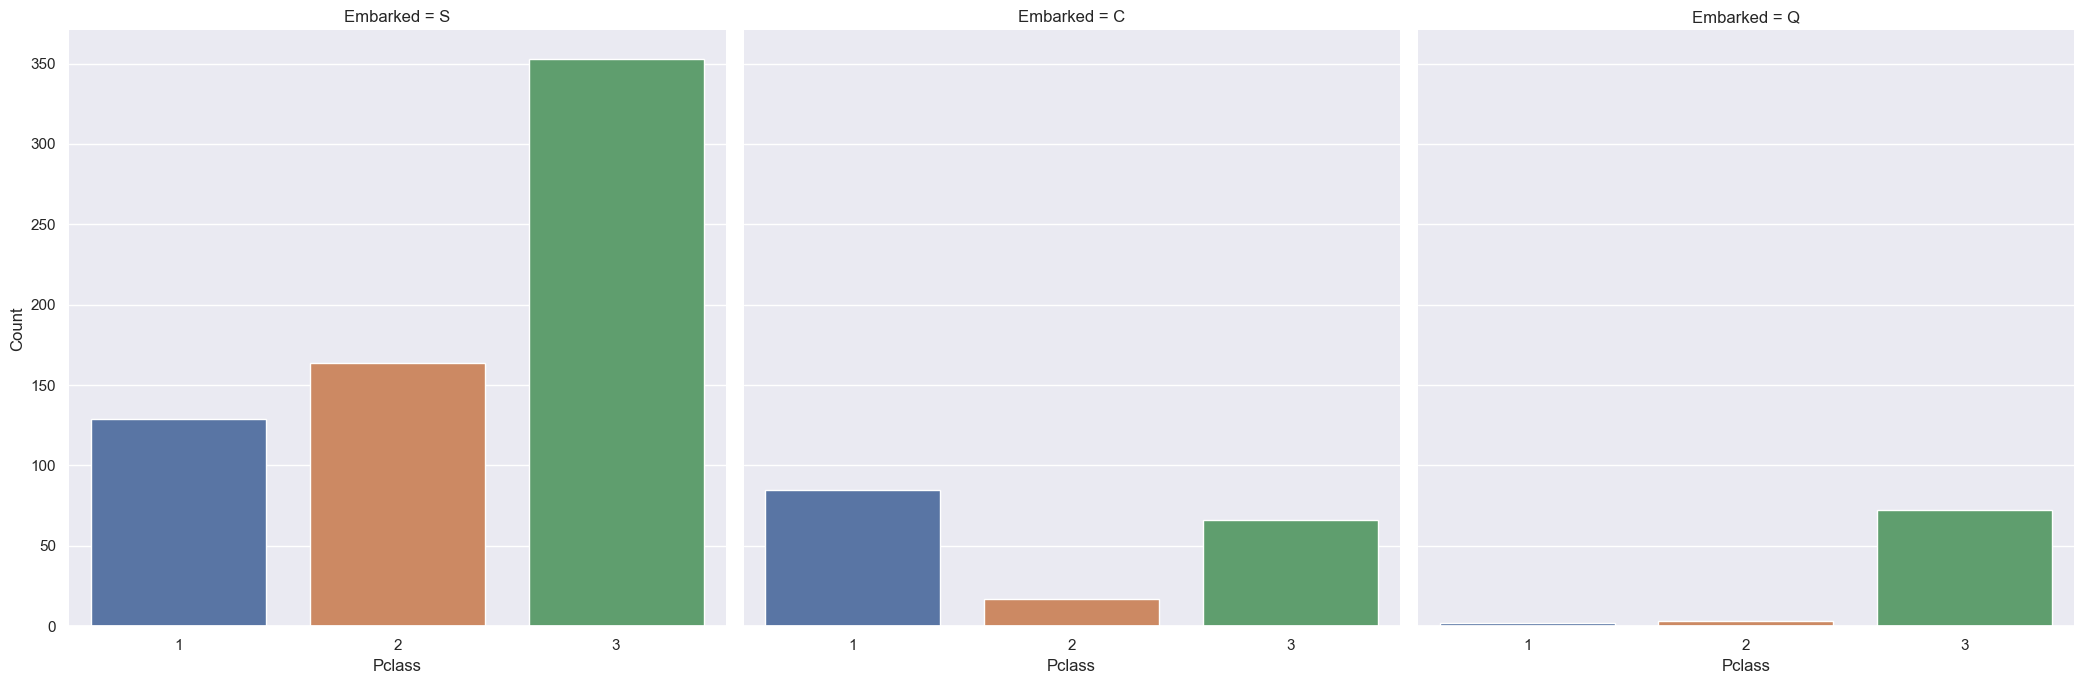

In [112]:
#explore Pclass vs Embarked
g = sns.catplot(x="Pclass",col="Embarked", data=data,height=7,kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


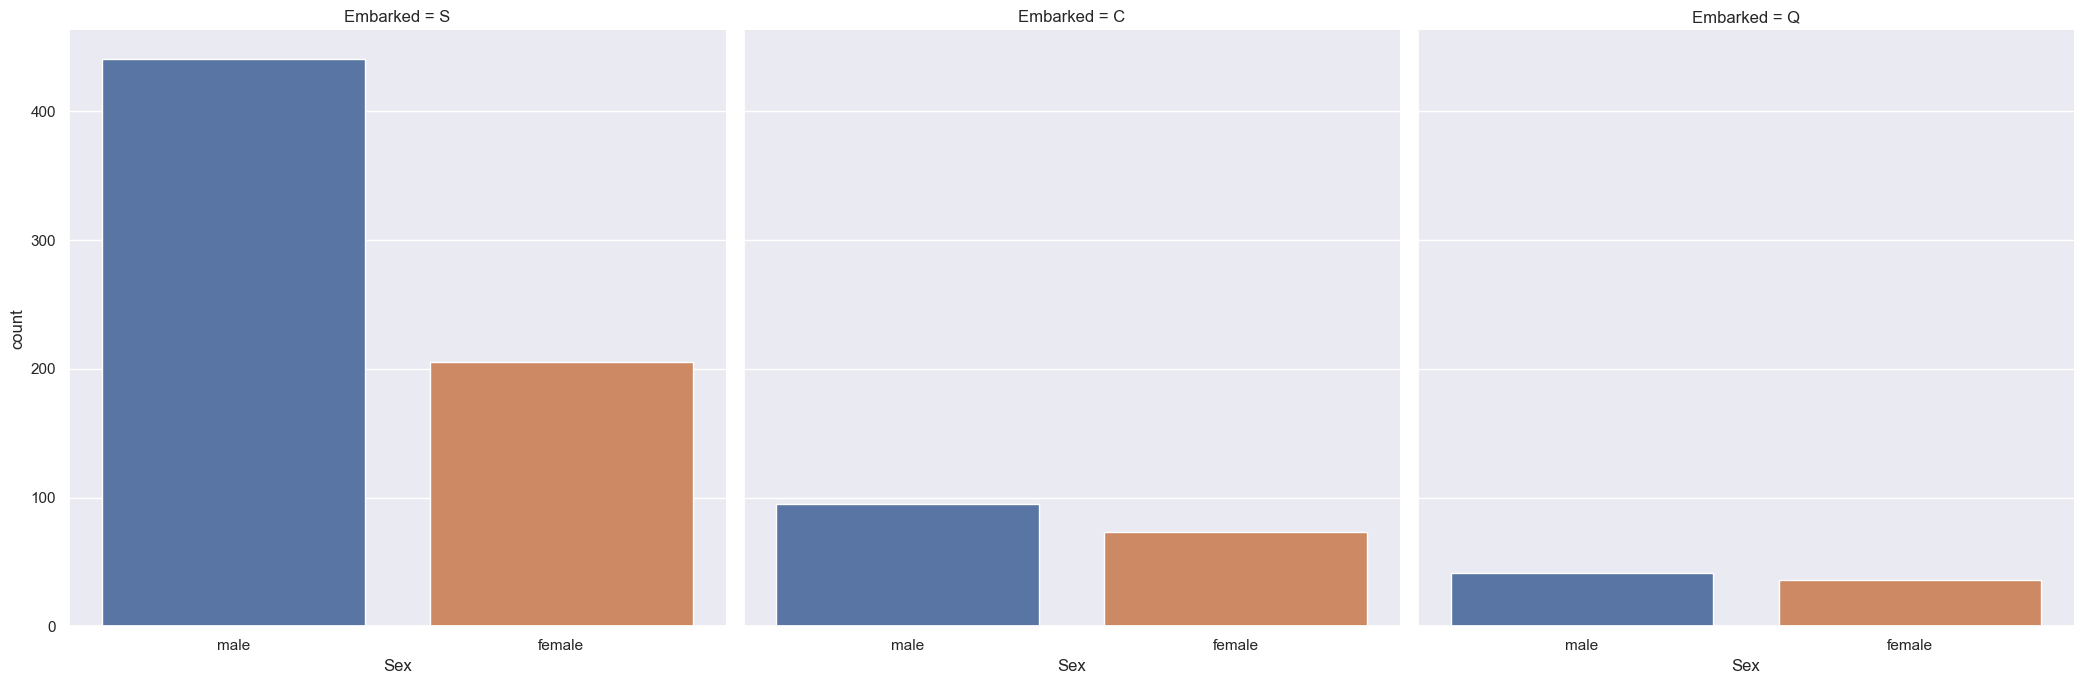

In [113]:
g = sns.catplot(x="Sex",col="Embarked", data=data,height=7,kind="count")


### Preparing data


In [114]:
data = pd.read_csv("titanic_data.csv")

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
mean = data["Age"].mean()
std = data["Age"].std()

is_null = data["Age"].isnull().sum()

In [117]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [118]:
rand_age=np.random.randint(mean-std,mean+std, size=is_null)

In [119]:
type(rand_age)

numpy.ndarray

In [120]:
a = data["Age"].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [121]:
data['Age'].isnull().sum()


0

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
data['Embarked'] = data['Embarked'].fillna("S")

In [124]:
col_to_drop = ["PassengerId", "Cabin", "Ticket","Name"]
data.drop(col_to_drop,axis=1,inplace=True)

In [125]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [126]:
genders = {"male" : 0, "female" : 1}
data["Sex"] = data["Sex"].map(genders)


In [127]:
ports = {"S": 0,"C": 1,"Q": 2}

data["Embarked"] = data["Embarked"].map(ports)

In [128]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Splitting the data

In [129]:
x = data.drop(data.columns[[0]], axis=1)
y = data['Survived']

In [130]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

### Feature Scaling

In [131]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)


### Classification

In [137]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier()

In [138]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [140]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [141]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest,logreg_ypred)
svc_classifier_acc = accuracy_score(ytest,svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest,dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest,knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest,rf_classifier_ypred)

In [143]:
print ("Logistic Regression : ", round(logreg_acc*100,2))
print ("Support Vector : ", round(svc_classifier_acc*100,2))
print ("decision Tree : ", round(dt_classifier_acc*100,2))
print ("K-NN Classifier : ", round(knn_classifier_acc*100,2))
print ("Random Forest : ", round(rf_classifier_acc*100,2))

Logistic Regression :  80.97
Support Vector :  82.09
decision Tree :  78.73
K-NN Classifier :  80.22
Random Forest :  84.33
